In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly import tools


%matplotlib inline

In [ ]:
df=pd.read_csv("/content/Online_Dating_Behavior_Dataset.csv")
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [ ]:
print(f"number of rows:--> {df.shape[0]} and number of columns:--> {df.shape[1]}")

number of rows:--> 1000 and number of columns:--> 7


In [ ]:
df.columns

Index(['Gender', 'PurchasedVIP', 'Income', 'Children', 'Age', 'Attractiveness',
       'Matches'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          1000 non-null   int64
 1   PurchasedVIP    1000 non-null   int64
 2   Income          1000 non-null   int64
 3   Children        1000 non-null   int64
 4   Age             1000 non-null   int64
 5   Attractiveness  1000 non-null   int64
 6   Matches         1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [ ]:
def checking_m(df):
    null_v = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

checking_m(df)

,Missing_Number,Missing_Percent
Gender,0,0.0
PurchasedVIP,0,0.0
Income,0,0.0
Children,0,0.0
Age,0,0.0
Attractiveness,0,0.0
Matches,0,0.0


In [ ]:
print("Numbers of duplicated rows :",df.duplicated().sum())

Numbers of duplicated rows : 0


In [ ]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='mako').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Gender,1000.000000,0.510000,0.500150,0.000000,0.000000,1.000000,1.000000,1.000000
PurchasedVIP,1000.000000,0.474000,0.499573,0.000000,0.000000,0.000000,1.000000,1.000000
Income,1000.000000,50988.447000,9889.336141,20786.000000,44358.500000,50841.500000,57396.000000,81931.000000
Children,1000.000000,0.978000,0.997251,0.000000,0.000000,1.000000,2.000000,3.000000
Age,1000.000000,34.616000,9.147799,18.000000,27.000000,35.000000,43.000000,49.000000
Attractiveness,1000.000000,5.624000,2.824288,1.000000,3.000000,6.000000,8.000000,10.000000
Matches,1000.000000,76.050000,52.713150,0.000000,0.000000,70.000000,120.000000,160.000000


In [ ]:
df.corr()["Matches"]

,Matches
Gender,0.800911
PurchasedVIP,0.338011
Income,0.007140
Children,0.016435
Age,-0.043462
Attractiveness,0.313557
Matches,1.000000


<Axes: >

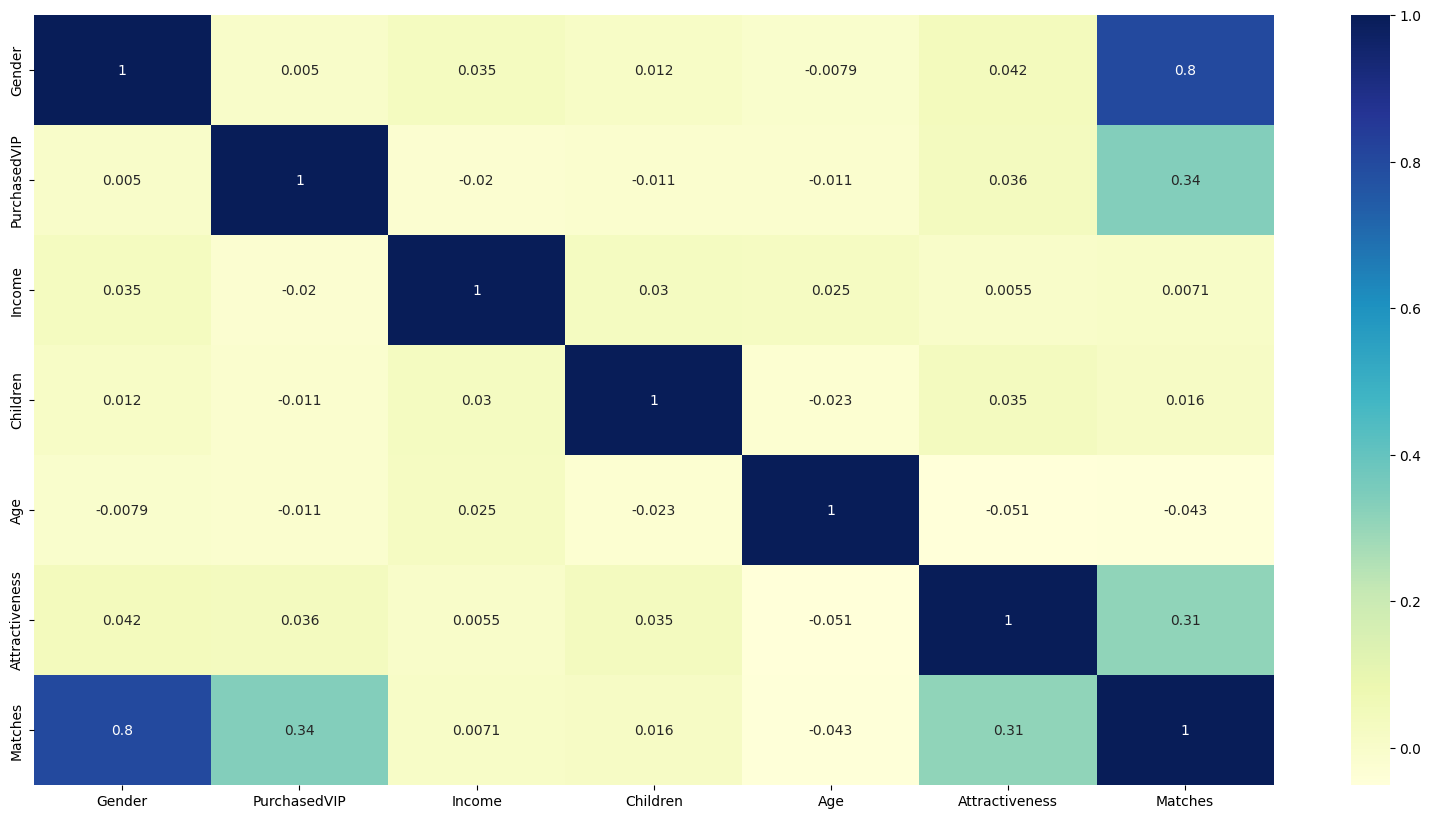

In [ ]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linecolor='black')

In [ ]:
def correlation(df,threshold):
    coll_corr=set() #set of all the names of correlated columns
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i] #getting the name of columns
                coll_corr.add(colname)
    return coll_corr

In [ ]:
corr_feature = correlation(df.iloc[:,:-1],0.85)
len(set(corr_feature))

0

In [ ]:
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [ ]:
numeric_col=["Income","Age","Attractiveness","Matches"]

In [ ]:
df[numeric_col].iplot(kind='histogram',subplots=True)

In [ ]:
i=1
for col in numeric_col:
    fig = px.box(df, x=col, points="all",template="plotly_dark",width=500,height=250)

    fig.show()

In [ ]:
numeric_col_withoutTerget=["Income","Age","Attractiveness"]

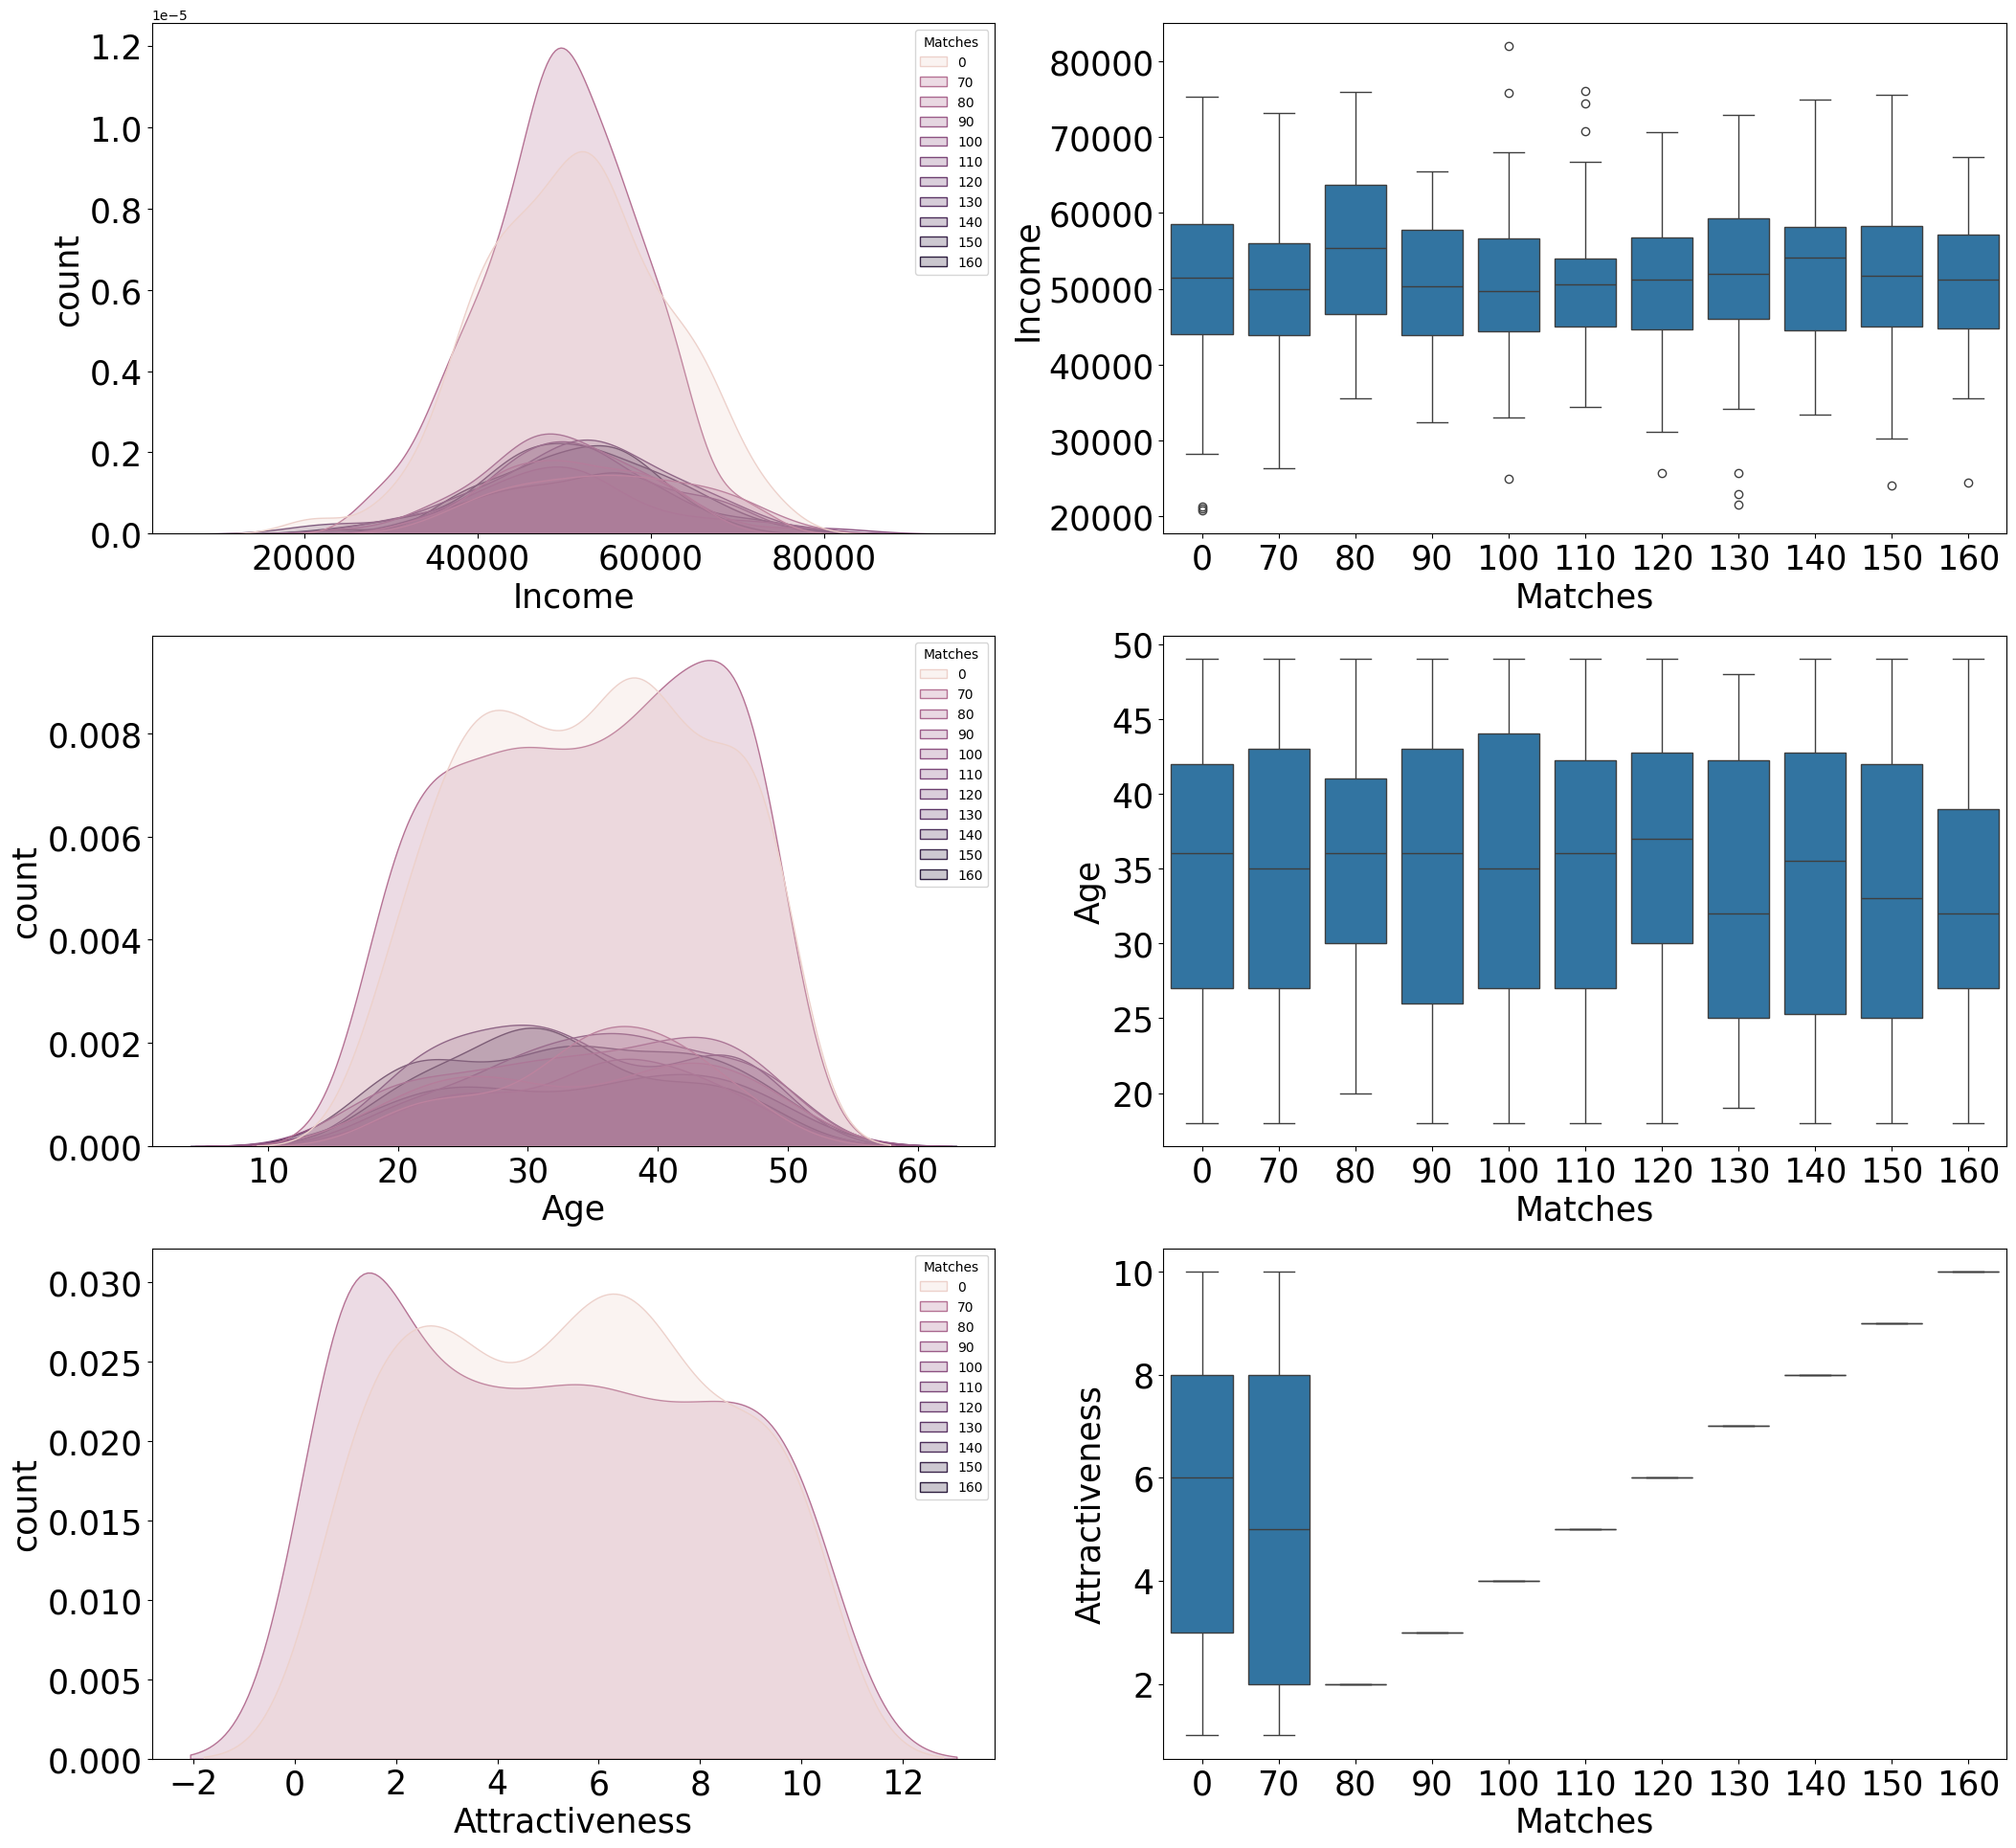

In [ ]:
i = 1
plt.figure(figsize=(25, 90))

for col in numeric_col_withoutTerget:
    plt.subplot(11, 2, i)
    sns.kdeplot(data=df, hue="Matches", x=col, fill=True)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col, fontsize=25)
    plt.ylabel("count", fontsize=25)
    i = i + 1

    plt.subplot(11, 2, i)
    sns.boxplot(x="Matches", y=col, data=df)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel("Matches", fontsize=25)
    plt.ylabel(col, fontsize=25)
    i = i + 1

plt.show()

In [ ]:
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [ ]:
encoded_cat=["Gender",'PurchasedVIP','Children']

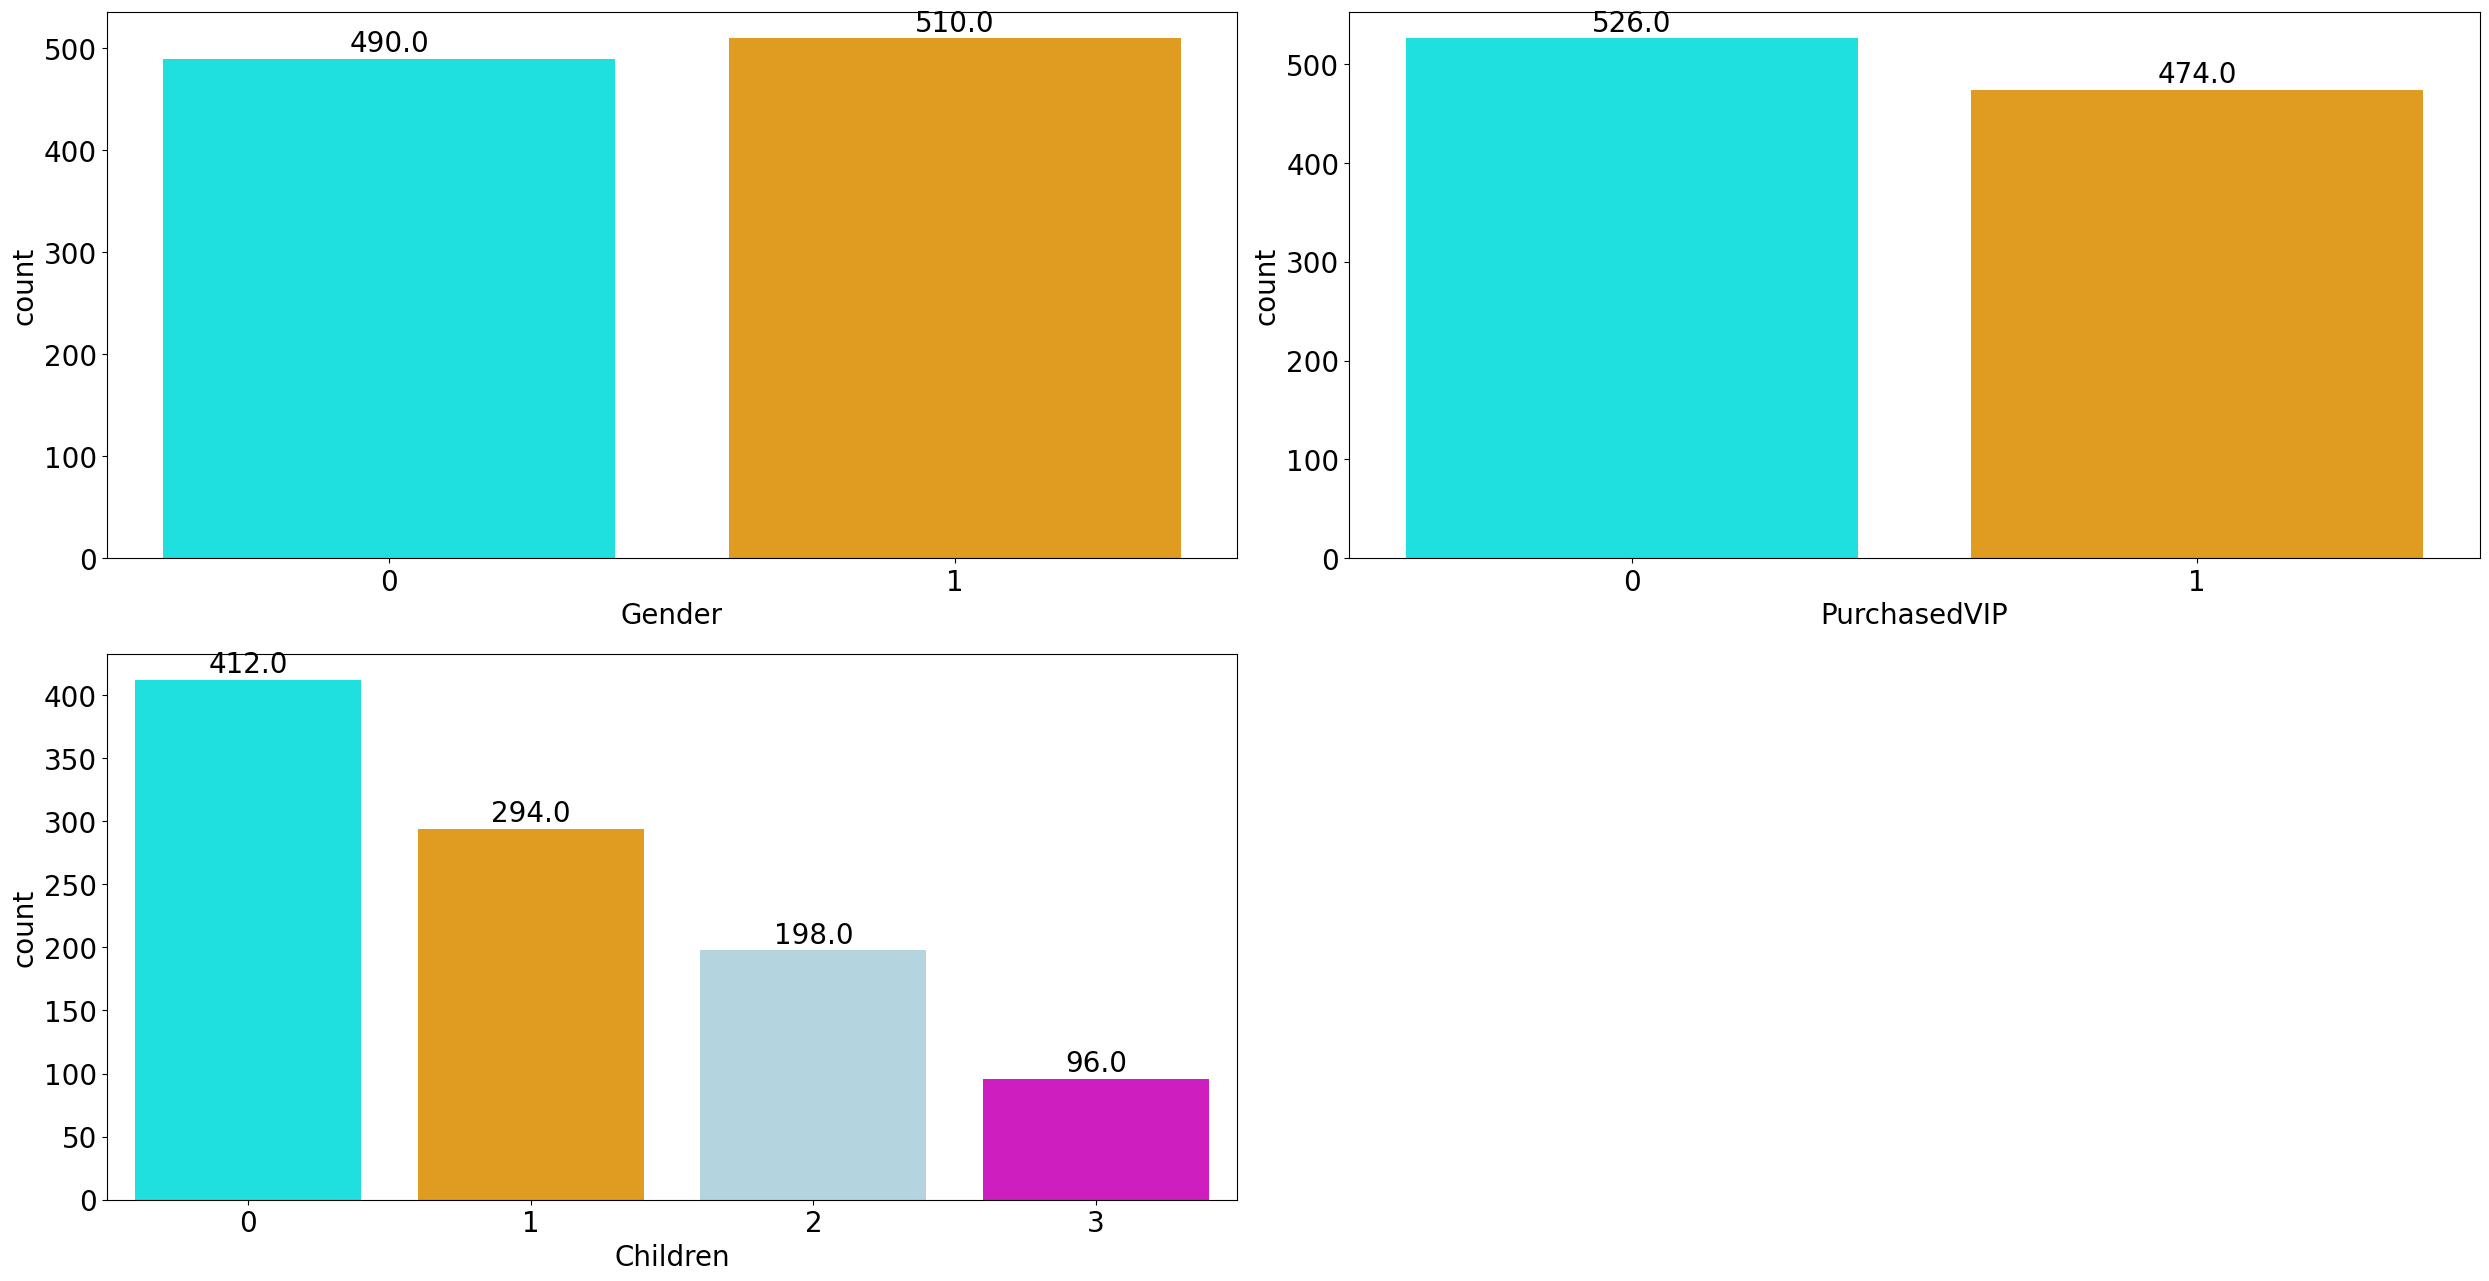

In [ ]:
i = 1
colors = ["#00FFFF", "#FFA500", "#ADD8E6", "#ED00D9", "#ED1400"]
textprops = {"fontsize": 22}
plt.figure(figsize=(25, 70))

for col in encoded_cat:
    plt.subplot(11, 2, i)
    ax = sns.countplot(data=df, x=col, palette=colors)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(col, fontsize=20)
    plt.ylabel("count", fontsize=20)

    # Adding labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=20, color='black', xytext=(0, 5),
                    textcoords='offset points')

    i = i + 1

plt.tight_layout()
plt.show()

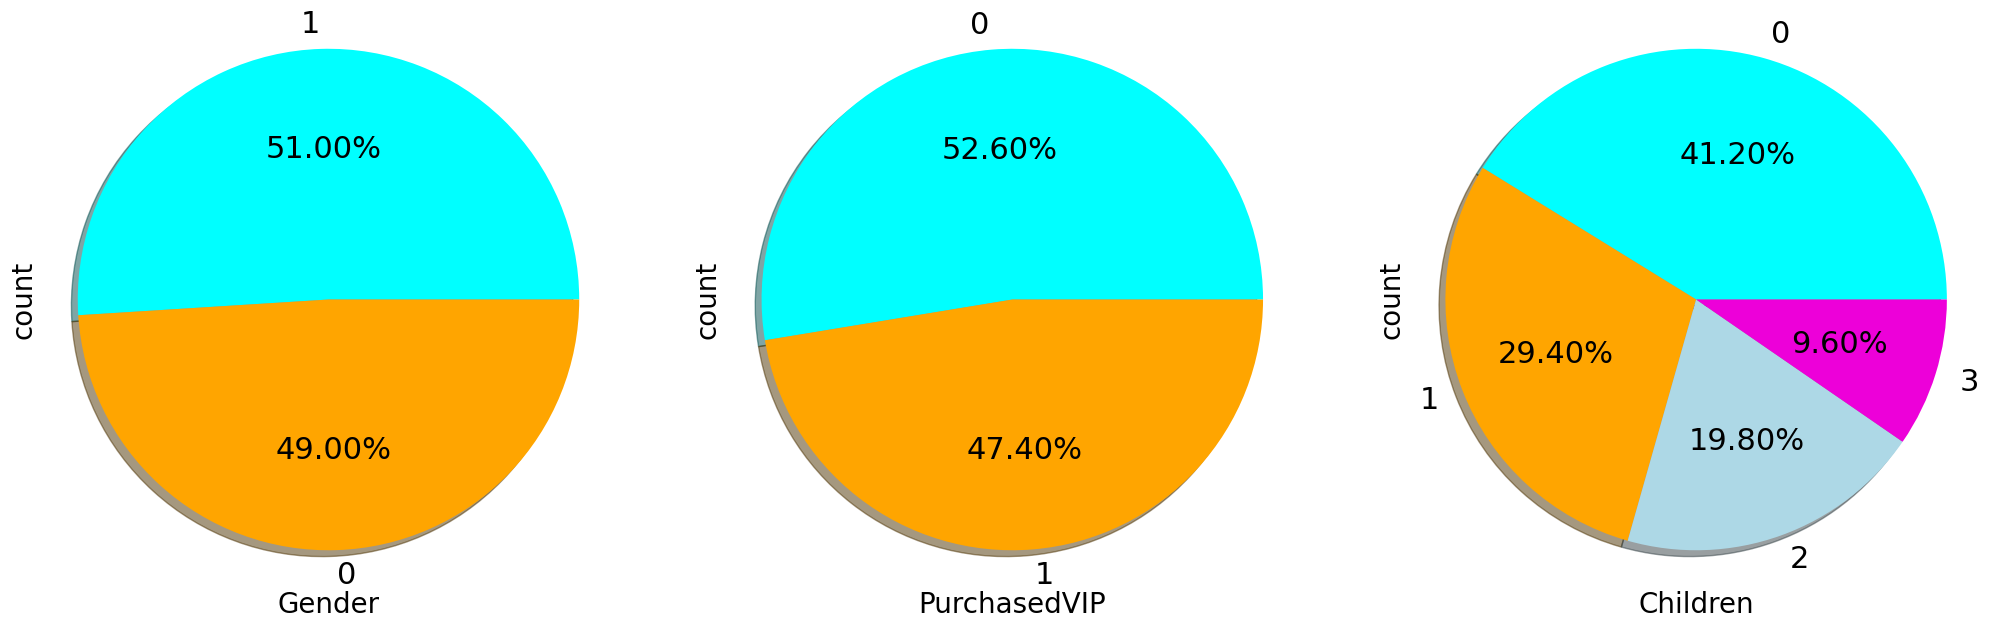

In [ ]:
i=1
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}
plt.figure(figsize=(25,120))
for col in encoded_cat:
    plt.subplot(11,3,i)
    df[col].value_counts().plot(kind="pie",autopct="%.2f%%",colors=colors,textprops=textprops,shadow=True, radius = 1.1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(col,fontsize=20)
    plt.ylabel("count",fontsize=20)
    i=i+1

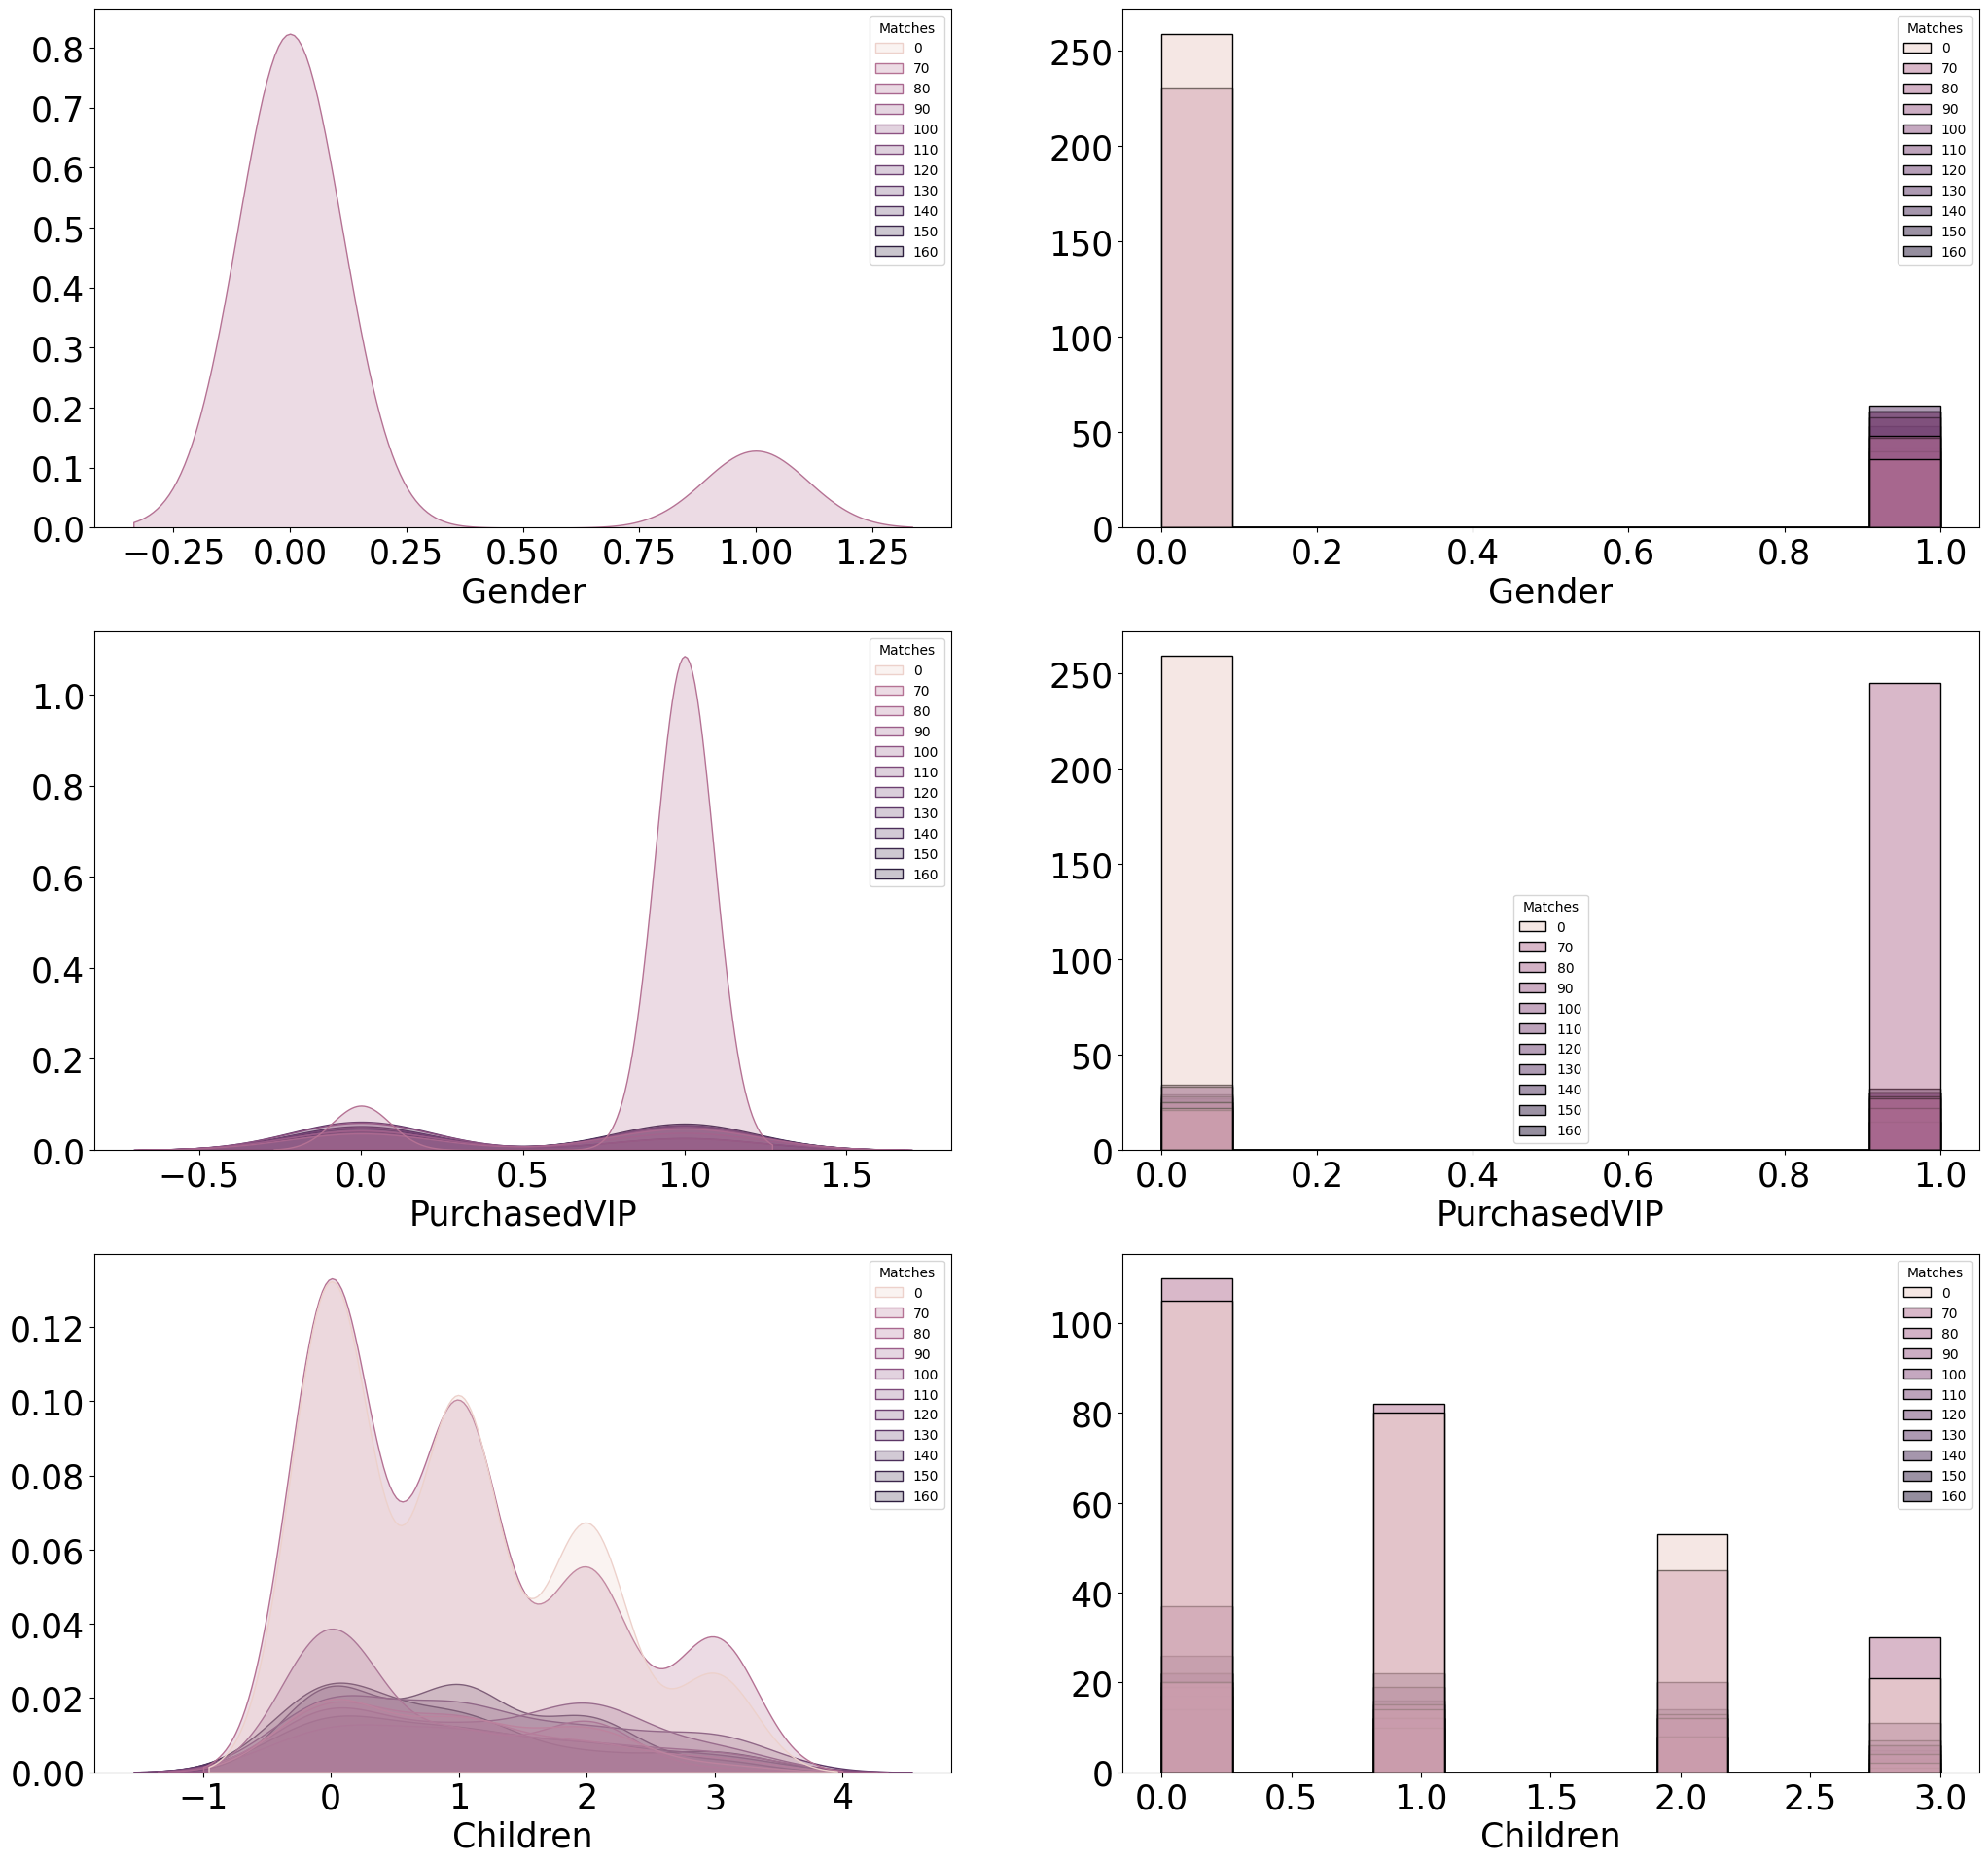

In [ ]:
i=1
plt.figure(figsize=(25,90))
for col in encoded_cat:
    plt.subplot(11,2,i)
    sns.kdeplot(data=df,hue="Matches",x=col,shade = "fill")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("",fontsize=25)
    i=i+1
    plt.subplot(11,2,i)
    sns.histplot(data=df,hue="Matches",x=col)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("",fontsize=25)
    i=i+1

plt.show()

In [ ]:
df.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [ ]:
X=df.iloc[:,0:-1]
y=df.Matches

In [ ]:
X.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness
0,0,1,51777,3,47,5
1,1,0,36646,0,42,7
2,0,0,53801,1,25,5
3,0,0,56105,0,35,8
4,0,0,55597,1,36,6


In [ ]:
skew_limit=0.75 # limit for skewed col
skew_vals=X[numeric_col_withoutTerget].skew()
skew_col=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending =False)

#graphically represent the skewed col
i=1
# print("Columns names: ",skew_col.index)
print("\n")
print("Number of Skewed columns:--->>\n",len(skew_col))
plt.figure(figsize=(40,60))
for col in skew_col.index:
    plt.subplot(8,2,i)
    sns.distplot(X[col],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    i=i+1


plt.show()



Number of Skewed columns:--->>
 0


<Figure size 4000x6000 with 0 Axes>

In [ ]:
def outlier(data):
    mean = data.mean()
    std = data.std()

    # Find the boundaries for outliers
    highest = mean + 3 * std
    lowest = mean - 3 * std

    # Find the outliers
    outliers = data[(data > highest) | (data < lowest)]

    return outliers

# Outliers detection and removal function for specified columns
def detect_and_remove_outliers(df, columns):
    outliers_df = pd.DataFrame()  # DataFrame to store outlier rows
    for col in columns:
        if col in df.columns:
            test = outlier(df[col])
            print("Column name:", col)
            print("Number of outliers:", len(test))
            print("\n")
            outliers_rows = df.loc[test.index]
            print("Outliers rows:")
            print(outliers_rows)
            print("<<<<<<<<<------------------------------------->>>>>>>>>")
            print("\n")
            outliers_df = pd.concat([outliers_df, outliers_rows])

    # Drop outliers from the original DataFrame
    df = df.drop(outliers_df.index, axis=0)

    return df, outliers_df


numeric_cols = ["Income", "Age", "Attractiveness"]
cleaned_df, outliers = detect_and_remove_outliers(X, numeric_cols)

Column name: Income
Number of outliers: 4


Outliers rows:
     Gender  PurchasedVIP  Income  Children  Age  Attractiveness
321       0             0   21037         0   27               7
759       0             0   21277         2   26               9
811       0             0   20786         0   25               5
835       1             1   81931         0   23               4
<<<<<<<<<------------------------------------->>>>>>>>>


Column name: Age
Number of outliers: 0


Outliers rows:
Empty DataFrame
Columns: [Gender, PurchasedVIP, Income, Children, Age, Attractiveness]
Index: []
<<<<<<<<<------------------------------------->>>>>>>>>


Column name: Attractiveness
Number of outliers: 0


Outliers rows:
Empty DataFrame
Columns: [Gender, PurchasedVIP, Income, Children, Age, Attractiveness]
Index: []
<<<<<<<<<------------------------------------->>>>>>>>>




In [ ]:
print("outliers are:")
outliers

outliers are:


,Gender,PurchasedVIP,Income,Children,Age,Attractiveness
321,0,0,21037,0,27,7
759,0,0,21277,2,26,9
811,0,0,20786,0,25,5
835,1,1,81931,0,23,4


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (800, 6)
X_test shape:  (200, 6)

Y_train shape:  (800,)
Y_test shape:  (200,)


In [ ]:
sc=StandardScaler()

x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns = x_train.columns[:])
x_test = pd.DataFrame(x_test_scaled, columns = x_test.columns[:])
x_train.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness
0,0.987577,-0.951190,-0.993861,-0.968627,0.277380,-0.229082
1,0.987577,1.051315,-1.409589,-0.968627,1.613480,-1.652503
2,0.987577,1.051315,0.543598,-0.968627,-0.502012,0.126773
3,0.987577,-0.951190,-0.403749,2.023271,0.500063,0.126773
4,-1.012579,1.051315,0.195330,-0.968627,0.611405,0.126773


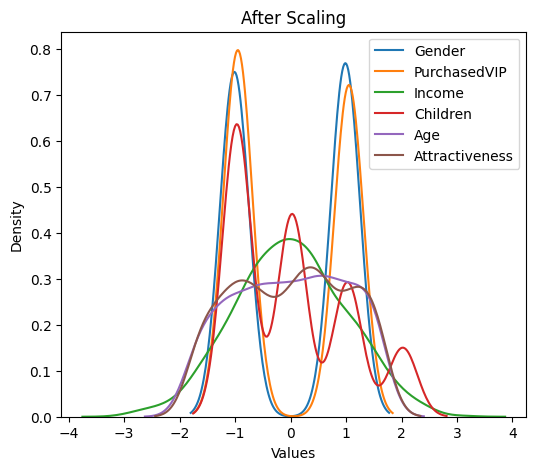

In [ ]:
plt.figure(figsize=(6, 5))
plt.title('After Scaling')
plt.xlabel('Values')
for col in x_train.columns:
    sns.kdeplot(x_train[col], label=col)
plt.legend()
plt.show()

In [ ]:
def models_score(models, x_train, x_test, y_train, y_test):
    scores = {}

    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)  # Calculate RMSE

        scores[name] = {
            'R2 Score': r2,
            'MSE': mse,
            'MAE': mae,
            'RMSE': rmse
        }

        # Printing the model name and evaluation metrics
        print("Model name:", name)
        print("R2 Score:", r2)
        print("MSE:", mse)
        print("MAE:", mae)
        print("RMSE:", rmse)
        print("\n<<<<------------------------------------------------------------->>>>\n")

    # Create a DataFrame from the scores dictionary
    model_scores = pd.DataFrame(scores).transpose()
    model_scores = model_scores.sort_values('R2 Score', ascending=False)

    return model_scores

In [ ]:
models = {"LinearRegression":LinearRegression(),
          "AdaBoost":AdaBoostRegressor(),
          "GradiantBoost":GradientBoostingRegressor(),
         "RandomForest":RandomForestRegressor(),
         "XgBoost": XGBRegressor(),
         "KNeighborsRegressor":KNeighborsRegressor(),
         "DecisionTree":DecisionTreeRegressor()}

In [ ]:
scores = models_score(models, x_train, x_test, y_train, y_test)

Model name: LinearRegression
R2 Score: 0.8097536666224447
MSE: 518.3432574571533
MAE: 18.882676848899948
RMSE: 22.76715303803164

<<<<------------------------------------------------------------->>>>

Model name: AdaBoost
R2 Score: 0.9923796217998677
MSE: 20.762406240298496
MAE: 2.796612406296546
RMSE: 4.556578347872282

<<<<------------------------------------------------------------->>>>

Model name: GradiantBoost
R2 Score: 0.9999999982573128
MSE: 4.748108100659219e-06
MAE: 0.0016584262993772298
RMSE: 0.002179015397067955

<<<<------------------------------------------------------------->>>>

Model name: RandomForest
R2 Score: 1.0
MSE: 0.0
MAE: 0.0
RMSE: 0.0

<<<<------------------------------------------------------------->>>>

Model name: XgBoost
R2 Score: 0.999999999998642
MSE: 3.7000117589861184e-09
MAE: 4.5614556947839444e-05
RMSE: 6.082772196117588e-05

<<<<------------------------------------------------------------->>>>

Model name: KNeighborsRegressor
R2 Score: 0.98893778513

In [ ]:
model_scores = scores.reset_index().rename({"index": "Algorithms"}, axis=1)

In [ ]:
model_scores

,Algorithms,R2 Score,MSE,MAE,RMSE
0,RandomForest,1.000000,0.000000e+00,0.000000,0.000000
1,DecisionTree,1.000000,0.000000e+00,0.000000,0.000000
2,XgBoost,1.000000,3.700012e-09,0.000046,0.000061
3,GradiantBoost,1.000000,4.748108e-06,0.001658,0.002179
4,AdaBoost,0.992380,2.076241e+01,2.796612,4.556578
5,KNeighborsRegressor,0.988938,3.014000e+01,3.230000,5.489991
6,LinearRegression,0.809754,5.183433e+02,18.882677,22.767153


In [ ]:
model_scores_r2 = model_scores.iloc[:,0:2]

In [ ]:
model_scores_r2.style.bar()

,Algorithms,R2 Score
0,RandomForest,1.000000
1,DecisionTree,1.000000
2,XgBoost,1.000000
3,GradiantBoost,1.000000
4,AdaBoost,0.992380
5,KNeighborsRegressor,0.988938
6,LinearRegression,0.809754
